# k-nearest neighbors with location history
Copyright 2020 Denis Rothman MIT License. See LICENSE.

## Program modules

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import os

In [ ]:
#@title Importing data <br> repository is set to "github"(default) to read the data from GitHub <br> set repository to "google" to read the data from Google Drive {display-mode: "form"}
import os
from google.colab import drive

#Set repository to "github" to read the data from GitHub 
#Set repository to "google" to read the data from Google
repository="github"

if repository=="github":
  !curl -L https://raw.githubusercontent.com/PacktPublishing/Hands-On-Explainable-AI-XAI-with-Python/master/Chapter01/DLH.csv --output "DLH.csv"
  !curl -L https://raw.githubusercontent.com/PacktPublishing/Hands-On-Explainable-AI-XAI-with-Python/master/Chapter01/glh.jpg --output "glh.jpg"

  #Setting the path for each file
  df2="/content/DLH.csv"
  print(df2)

if repository=="google":
  #Mounting the drive. If it is not mounted, a prompt will provide instructions.
  drive.mount('/content/drive')
  #Setting the path for each file
  df2='/content/drive/My Drive/XAI/Chapter01/DLH.csv'
  print(df2)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4985  100  4985    0     0  15481      0 --:--:-- --:--:-- --:--:-- 15433
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10261  100 10261    0     0  49570      0 --:--:-- --:--:-- --:--:-- 49570
/content/DLH.csv


## Opening and reading the file

In [ ]:
df = pd.read_csv(df2)
print (df)

     colored_sputum  cough  fever  headache  days  france  chicago    class
0               1.0    3.5    9.4       3.0     3       0        1      flu
1               1.0    3.4    8.4       4.0     2       0        1      flu
2               1.0    3.3    7.3       3.0     4       0        1      flu
3               1.0    3.4    9.5       4.0     2       0        1      flu
4               1.0    2.0    8.0       3.5     1       0        1      flu
..              ...    ...    ...       ...   ...     ...      ...      ...
179             2.0    3.0    8.0       9.0     5       0        1  bad_flu
180             1.0    3.0    8.0       9.0     5       0        1  bad_flu
181             3.0    3.0    8.0       9.0     5       0        1  bad_flu
182             1.0    4.0    8.0       9.0     5       0        1  bad_flu
183             1.0    5.0    8.0       9.0     5       0        1  bad_flu

[184 rows x 8 columns]


## Training the model

In [ ]:
# KNN classification labels
X = df.loc[:,'colored_sputum':'chicago']
Y = df.loc[:,'class']

# Trains the model
knn = KNeighborsClassifier()
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Evaluating the symptoms on a scale of 1 to 9

In [ ]:
#@title Alert evaluation form: do not change the values of france and chicago
colored_sputum =  1#@param {type:"integer"}
cough=3#@param {type:"integer"}
fever=7#@param {type:"integer"}
headache=7#@param {type:"integer"}
days=5#@param {type:"integer"}
# Insert the function here that analyzes the conjunction of
# the Location History of the patient and location of
# diseases per country/location 
france=0#@param {type:"integer"}
chicago=1#@param {type:"integer"}

## The prediction based on the symptoms

In [ ]:
# colored_sputum,cough,fever,headache
cs=colored_sputum;c=cough;f=fever;h=headache;d=days;fr=france;ch=chicago;
X_DL = [[cs,c,f,h,d,fr,ch]] 
#X_DL = [[1,3,7,3,5,0,1]] 

prediction = knn.predict(X_DL)
predictv=str(prediction).strip('[]')
print ("The prediction is:",predictv)


The prediction is: 'bad_flu'


## Alert if message is "bad_flu"

In [ ]:
alert=predictv # instead of the constant "bad_flu", a variable can used after going through a list of serious diseases
print(alert)
if alert=='bad_flu':
  print("Further urgent information might be required. Activate the XAI interface.")

'bad_flu'


## XAI STEP 1: Displaying the model's output and providing explanations

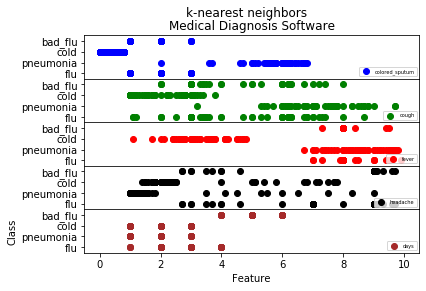

In [ ]:
df = pd.read_csv(df2) 
# Plotting the relation of each feature with each class
figure,(sub1,sub2,sub3,sub4,sub5)=plt.subplots(5,sharex=True,sharey=True)
plt.suptitle('k-nearest neighbors')
plt.xlabel('Feature')
plt.ylabel('Class') 

X = df.loc[:,'colored_sputum']
Y = df.loc[:,'class']
sub1.scatter(X, Y,color='blue',label='colored_sputum')
sub1.legend(loc=4, prop={'size': 5})
sub1.set_title('Medical Diagnosis Software')

X = df.loc[:,'cough']
Y = df.loc[:,'class']
sub2.scatter(X, Y,color='green',label='cough')
sub2.legend(loc=4, prop={'size': 5})

X = df.loc[:,'fever']
Y = df.loc[:,'class']
sub3.scatter(X, Y,color='red',label='fever')
sub3.legend(loc=4, prop={'size': 5})

X = df.loc[:,'headache']
Y = df.loc[:,'class']
sub4.scatter(X, Y,color='black',label='headache')
sub4.legend(loc=4, prop={'size': 5})


X = df.loc[:,'days']
Y = df.loc[:,'class']
sub5.scatter(X, Y,color='brown',label='days')
sub5.legend(loc=4, prop={'size': 5})

figure.subplots_adjust(hspace=0)
plt.show()

Explanations for alert level

In [ ]:
#This is an example program. DO NOT USE this for a real-life diagnosis. 
#cs=colored_sputum;c=cough;f=fever;
#h=headache;d=days;fr=france;ch=chicago;
if(f>5):
  print("your patient has a high fever")
if(d>4):
  print("your patient has had a high fever for more than 4 days even with medication")
if(fr<1):
  print("it is probable that your patient was not in contact with a virus in France")
if(chicago>0):
  print("it is probable that your patient was in contact with a virus in Chicago")


your patient has a high fever
your patient has had a high fever for more than 4 days even with medication
it is probable that your patient was not in contact with a virus in France
it is probable that your patient was in contact with a virus in Chicago


## Location History information

In [ ]:
print("Your patient is part of the XAI program that you have signed up for.")
print("As such, we have your patient's authorization to access his Google Location History which we update in our database once a day between 10 pm and 6 am.")
print("The following map shows that your patient was in Chicago, Paris, and Lyon within the past 3 weeks")
print("For this diagnosis, we only activated a search for the past 3 weeks")
print("Please ask your patient if he was in Chicago in the past 3 weeks. If the answer is yes, continue the AI explanation.")

Your patient is part of the XAI program that you have signed up for.
As such, we have your patient's authorization to access his Google Location History which we update in our database once a day between 10 pm and 6 am.
The following map shows that your patient was in Chicago, Paris, and Lyon within the past 3 weeks
For this diagnosis, we only activated a search for the past 3 weeks
Please ask your patient if he was in Chicago in the past 3 weeks, please. If the answer is yes, continue the AI explanation.


![](/content/glh.jpg)


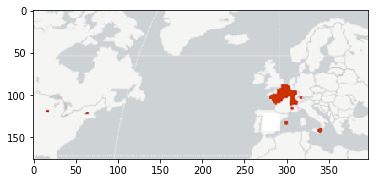

In [ ]:
import matplotlib.image as mpimg
img=mpimg.imread('/content/glh.jpg')
imgplot = plt.imshow(img)
plt.show()

## Our AI program used the detection data of the CULEX PIPIENS/RESTUANS in Chicago

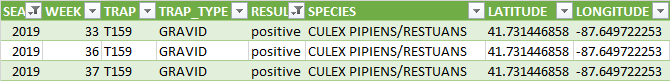

In [ ]:
print("Your patient was in Chicago in the period during which there were positive detections of the CULEX PIPIENS/RESTUANS mosquito.")
print("The mosquitos were trapped with a Gravid trap.")
print("The CULEX PIPIENS/RESTUANS mosquito is a vector for the West Nile virus.")
print("We matched your patient's location history with the presence of the CULEX PIPIENS/RESTUANS in Chicago.")
print("We then matched the CULEX PIPIENS/RESTUANS with West Nile virus.")
print("Continue to see information the West Nile virus.")

Your patient was in Chicago in the period during which there were positive detections of the CULEX PIPIENS/RESTUANS mosquito.
The mosquitos were trapped with a Gravid trap.
The CULEX PIPIENS/RESTUANS mosquito is a vector for the West Nile Virus.
We matched your patient's location history with the presence of the CULEX PIPIENS/RESTUANS in Chicago.
We then matched the CULEX PIPIENS/RESTUANS with West Nile Virus.
Continue to see information the West Nile Virus.


## If need information on the West Nile virus, click on the following link:
[West Nile virus](https://www.healthline.com/health/west-nile-virus#treatment)

if you are interested in similar situations:
[cases in Greece](
https://www.forbes.com/sites/alexledsom/2019/06/17/mosquitoes-threaten-greek-tourist-industry-with-west-nile-virus/#1123f99648a8)
